In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
import pandas as pd
import numpy as np

In [23]:
from scalcs import mechanism
from scalcs import scalcslib as scl

In [24]:
df = pd.read_excel('AMPAR_ZRVH_06.xlsx', sheet_name='s3_glu', index_col=None, header=None)

In [25]:
print(df)

            0                                             1     2      3  \
0    mectitle                                      scheme_3   NaN    NaN   
1   ratetitle                                     glutamate   NaN    NaN   
2     comment  Zhang, .. Howe 2006 BJ;  Scheme 3; glutamate   NaN    NaN   
3       state                                            O1     A  3e-11   
4       state                                            O2     A  3e-11   
5       state                                            O3     A  3e-11   
6       state                                          RGS3     B      0   
7       state                                          RGS2     B      0   
8       state                                          RGS1     B      0   
9       state                                            RG     B      0   
10      state                                             R     C      0   
11      state                                            D3     D      0   
12      stat

In [26]:
df_states = df.loc[df.iloc[:, 0] == "state"]
print (df_states)

        0     1  2      3   4    5   6   7
3   state    O1  A  3e-11 NaN  NaN NaN NaN
4   state    O2  A  3e-11 NaN  NaN NaN NaN
5   state    O3  A  3e-11 NaN  NaN NaN NaN
6   state  RGS3  B      0 NaN  NaN NaN NaN
7   state  RGS2  B      0 NaN  NaN NaN NaN
8   state  RGS1  B      0 NaN  NaN NaN NaN
9   state    RG  B      0 NaN  NaN NaN NaN
10  state     R  C      0 NaN  NaN NaN NaN
11  state    D3  D      0 NaN  NaN NaN NaN
12  state    D2  D      0 NaN  NaN NaN NaN
13  state    D1  D      0 NaN  NaN NaN NaN


In [27]:
states = {}
for index, row in df_states.iterrows():
    #print(row[0])
    states[row[1]] = mechanism.State(row[2], row[1], row[3])
print (states)

{'O1': <scalcs.mechanism.State object at 0x000001DE764F42E8>, 'O2': <scalcs.mechanism.State object at 0x000001DE76880240>, 'O3': <scalcs.mechanism.State object at 0x000001DE76880828>, 'RGS3': <scalcs.mechanism.State object at 0x000001DE76880EF0>, 'RGS2': <scalcs.mechanism.State object at 0x000001DE76880CF8>, 'RGS1': <scalcs.mechanism.State object at 0x000001DE76880160>, 'RG': <scalcs.mechanism.State object at 0x000001DE76880F60>, 'R': <scalcs.mechanism.State object at 0x000001DE76880C88>, 'D3': <scalcs.mechanism.State object at 0x000001DE76880FD0>, 'D2': <scalcs.mechanism.State object at 0x000001DE768806A0>, 'D1': <scalcs.mechanism.State object at 0x000001DE76880470>}


In [28]:
df_rates = df.loc[df.iloc[:, 0] == "rate"]
print (df_rates)

       0       1     2     3           4    5             6             7
15  rate   beta1  RGS1    O1      5000.0  NaN  1.000000e-15  1.000000e+07
16  rate   beta2  RGS2    O2      5000.0  NaN  1.000000e-15  1.000000e+07
17  rate   beta3  RGS3    O3      5000.0  NaN  1.000000e-15  1.000000e+07
18  rate  alpha1    O1  RGS1      4000.0  NaN  1.000000e-15  1.000000e+07
19  rate  alpha2    O2  RGS2      4000.0  NaN  1.000000e-15  1.000000e+07
20  rate  alpha3    O3  RGS3      4000.0  NaN  1.000000e-15  1.000000e+07
21  rate  delta1  RGS1    D1       500.0  NaN  1.000000e-15  1.000000e+07
22  rate  delta2  RGS2    D2       100.0  NaN  1.000000e-15  1.000000e+07
23  rate  delta3  RGS3    D3        50.0  NaN  1.000000e-15  1.000000e+07
24  rate  gamma1    D1  RGS1         1.0  NaN  1.000000e-15  1.000000e+07
25  rate  gamma2    D2  RGS2         1.0  NaN  1.000000e-15  1.000000e+07
26  rate  gamma3    D3  RGS3         1.0  NaN  1.000000e-15  1.000000e+07
27  rate     km1    RG     R     50000

In [29]:
rates = []
for index, row in df_rates.iterrows():
    print(row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7])
    if row[5] is 'c':
        bound = 'c'
    else:
        bound = None
    print(row[4], row[2], row[3], row[1], bound, row[6], row[7])
    rates.append(mechanism.Rate(row[4], states[row[2]], states[row[3]], name=row[1], 
                                eff=bound, limits=[row[6], row[7]]))
    
#    rates.append(mechanism.Rate(rate, StateList[irate[i]-1],
#            StateList[jrate[i]-1], name=ratename[i], eff=bound))

rate beta1 RGS1 O1 5000.0 nan 1e-15 10000000.0
5000.0 RGS1 O1 beta1 None 1e-15 10000000.0
rate beta2 RGS2 O2 5000.0 nan 1e-15 10000000.0
5000.0 RGS2 O2 beta2 None 1e-15 10000000.0
rate beta3 RGS3 O3 5000.0 nan 1e-15 10000000.0
5000.0 RGS3 O3 beta3 None 1e-15 10000000.0
rate alpha1 O1 RGS1 4000.0 nan 1e-15 10000000.0
4000.0 O1 RGS1 alpha1 None 1e-15 10000000.0
rate alpha2 O2 RGS2 4000.0 nan 1e-15 10000000.0
4000.0 O2 RGS2 alpha2 None 1e-15 10000000.0
rate alpha3 O3 RGS3 4000.0 nan 1e-15 10000000.0
4000.0 O3 RGS3 alpha3 None 1e-15 10000000.0
rate delta1 RGS1 D1 500.0 nan 1e-15 10000000.0
500.0 RGS1 D1 delta1 None 1e-15 10000000.0
rate delta2 RGS2 D2 100.0 nan 1e-15 10000000.0
100.0 RGS2 D2 delta2 None 1e-15 10000000.0
rate delta3 RGS3 D3 50.0 nan 1e-15 10000000.0
50.0 RGS3 D3 delta3 None 1e-15 10000000.0
rate gamma1 D1 RGS1 1.0 nan 1e-15 10000000.0
1.0 D1 RGS1 gamma1 None 1e-15 10000000.0
rate gamma2 D2 RGS2 1.0 nan 1e-15 10000000.0
1.0 D2 RGS2 gamma2 None 1e-15 10000000.0
rate gamma3 D3

In [30]:
mectitle = df.loc[df.iloc[:, 0] == "mectitle"].iloc[0][1]
print(mectitle)
ratetitle = df.loc[df.iloc[:, 0] == "ratetitle"].iloc[0][1]
print(ratetitle)

scheme_3
glutamate


In [31]:
mec = mechanism.Mechanism(rates, [], mtitle=mectitle, rtitle=ratetitle)
print(mec)


class dcpyps.Mechanism
Values of unit rates [1/sec]:
0	From RGS1  	to O1    	beta1   	5000.0
1	From RGS2  	to O2    	beta2   	5000.0
2	From RGS3  	to O3    	beta3   	5000.0
3	From O1  	to RGS1    	alpha1   	4000.0
4	From O2  	to RGS2    	alpha2   	4000.0
5	From O3  	to RGS3    	alpha3   	4000.0
6	From RGS1  	to D1    	delta1   	500.0
7	From RGS2  	to D2    	delta2   	100.0
8	From RGS3  	to D3    	delta3   	50.0
9	From D1  	to RGS1    	gamma1   	1.0
10	From D2  	to RGS2    	gamma2   	1.0
11	From D3  	to RGS3    	gamma3   	1.0
12	From RG  	to R    	km1   	50000.0
13	From R  	to RG    	kp1   	10000000.0
14	From RG  	to RGS1    	CC   	50000.0
15	From RGS1  	to RG    	CO   	3000.0
16	From RGS1  	to RGS2    	CS1   	30.0
17	From RGS2  	to RGS1    	CD1   	500.0
18	From RGS2  	to RGS3    	CS2   	200.0
19	From RGS3  	to RGS2    	CD2   	20.0

Conductance of state O1 (pS)  =      30

Conductance of state O2 (pS)  =      30

Conductance of state O3 (pS)  =      30

Number of open states = 3
Number

In [32]:
from scalcs import popen

In [33]:
pc = popen.PopenCurve(mec)

In [34]:
c = pc._pilot_conc
y = pc._pilot_popen

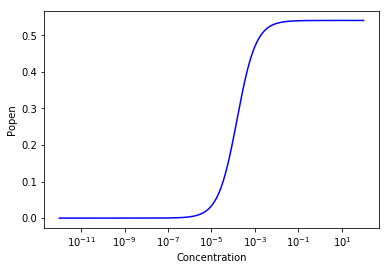

In [35]:
plt.semilogx(c, y, 'b')
plt.ylabel('Popen')
plt.xlabel('Concentration');

In [36]:
pc.EC50

0.00015050878314392947

In [37]:
tres = 30e-6
conc = 100e-9    # 100 nM
mec.set_eff('c', conc)
print(scl.printout_occupancies(mec, tres))




*******************************************

Open	Equilibrium	Mean life	Mean latency (ms)
state	occupancy	(ms)	to next shutting
			given start in this state
Subset A 	0.00058619	0.25
1	0.00035313	0.25	0.25
2	2.1188e-05	0.25	0.25
3	0.00021188	0.25	0.25

Shut	Equilibrium	Mean life	Mean latency (ms)
state	occupancy	(ms)	to next opening
			given start in this state
Subset B 	0.0004859	0.14532
4	0.0002825	0.11723	696.51
5	1.695e-05	0.17241	79.184
6	0.0001695	0.19724	10.475
7	1.695e-05	0.01	1696.5

Subset C 	0.84751	1000
8	0.84751	1000	2696.5

Subset D 	0.15142	1000
9	0.14125	1000	1696.5
10	0.001695	1000	1079.2
11	0.0084751	1000	1010.5


Initial vector for HJC openings phiOp =
	0.064519	0.055682	0.87959
Initial vector for ideal openings phiOp =
	0.60241	0.036145	0.36145
Initial vector for HJC shuttings phiSh =
	0.085525	0.054785	0.85021	0.0044431	0.0048338
Initial vector for ideal shuttings phiSh =
	0.60241	0.036145	0.36145	0	0



In [38]:
mec.Q

array([[-4.00e+03,  0.00e+00,  0.00e+00,  4.00e+03,  0.00e+00,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00, -4.00e+03,  0.00e+00,  0.00e+00,  4.00e+03,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00, -4.00e+03,  0.00e+00,  0.00e+00,  4.00e+03,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 5.00e+03,  0.00e+00,  0.00e+00, -8.53e+03,  3.00e+01,  0.00e+00,
         3.00e+03,  0.00e+00,  5.00e+02,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  5.00e+03,  0.00e+00,  5.00e+02, -5.80e+03,  2.00e+02,
         0.00e+00,  0.00e+00,  0.00e+00,  1.00e+02,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  5.00e+03,  0.00e+00,  2.00e+01, -5.07e+03,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  5.00e+01],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  5.00e+04,  0.00e+00,  0.00e+00,
        -1.00e+05,  5.00e+04,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.0

In [39]:
conc = 100e-3    # 100 nM
mec.set_eff('c', conc)
print(scl.printout_occupancies(mec, tres))




*******************************************

Open	Equilibrium	Mean life	Mean latency (ms)
state	occupancy	(ms)	to next shutting
			given start in this state
Subset A 	0.003844	0.25
1	0.0023157	0.25	0.25
2	0.00013894	0.25	0.25
3	0.0013894	0.25	0.25

Shut	Equilibrium	Mean life	Mean latency (ms)
state	occupancy	(ms)	to next opening
			given start in this state
Subset B 	0.0031864	0.14532
4	0.0018525	0.11723	99.775
5	0.00011115	0.17241	26.832
6	0.0011115	0.19724	10.266
7	0.00011115	0.01	99.796

Subset C 	5.5576e-06	0.001
8	5.5576e-06	0.001	99.797

Subset D 	0.99296	1000
9	0.92627	1000	1099.8
10	0.011115	1000	1026.8
11	0.055576	1000	1010.3


Initial vector for HJC openings phiOp =
	0.064483	0.055682	0.87963
Initial vector for ideal openings phiOp =
	0.60241	0.036145	0.36145
Initial vector for HJC shuttings phiSh =
	0.086552	0.054787	0.85028	0.0060696	0.0021195
Initial vector for ideal shuttings phiSh =
	0.60241	0.036145	0.36145	0	0



In [40]:
mec.Q

array([[-4.00e+03,  0.00e+00,  0.00e+00,  4.00e+03,  0.00e+00,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00, -4.00e+03,  0.00e+00,  0.00e+00,  4.00e+03,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00, -4.00e+03,  0.00e+00,  0.00e+00,  4.00e+03,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 5.00e+03,  0.00e+00,  0.00e+00, -8.53e+03,  3.00e+01,  0.00e+00,
         3.00e+03,  0.00e+00,  5.00e+02,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  5.00e+03,  0.00e+00,  5.00e+02, -5.80e+03,  2.00e+02,
         0.00e+00,  0.00e+00,  0.00e+00,  1.00e+02,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  5.00e+03,  0.00e+00,  2.00e+01, -5.07e+03,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  5.00e+01],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  5.00e+04,  0.00e+00,  0.00e+00,
        -1.00e+05,  5.00e+04,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.0